<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Simulación matemática. 

**Nombres:** Daniel Hernandez Vila. Talpa de Jesús Ornelas Güitrón

**Fecha:** 02 de octubre del 2023.

**Expediente** : 728962. 745134.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Daniel-Iteso/Tarea5-6_HernandezDanielOrnelasTalpa

# Tarea 6: Clase 10

## Enunciado de tarea (Transcibirlo)
> 1. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 1, 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$


$$[x^2+2y^2\leq-2x+8y-7] = [\frac{1}{2}(x+1)^2+(y-2)^2 \leq1]$$

Al solucionarlo mediante el uso de un solver se observa que la figura tiene sus vertices en:
$$-1-\sqrt{2}<x<\sqrt{2}-1$$
$$1\leq y\leq3$$
Con el centro en: 
$$(-1,2)$$

Es por ello que los limites seleccionados son [-3,0] y [1,4] con un area de:
$$a=\pi*r_1*r_2$$
$$a=\pi*\sqrt{2}*1$$
$$a\approx4.4429$$

Código de solución estudiante 1

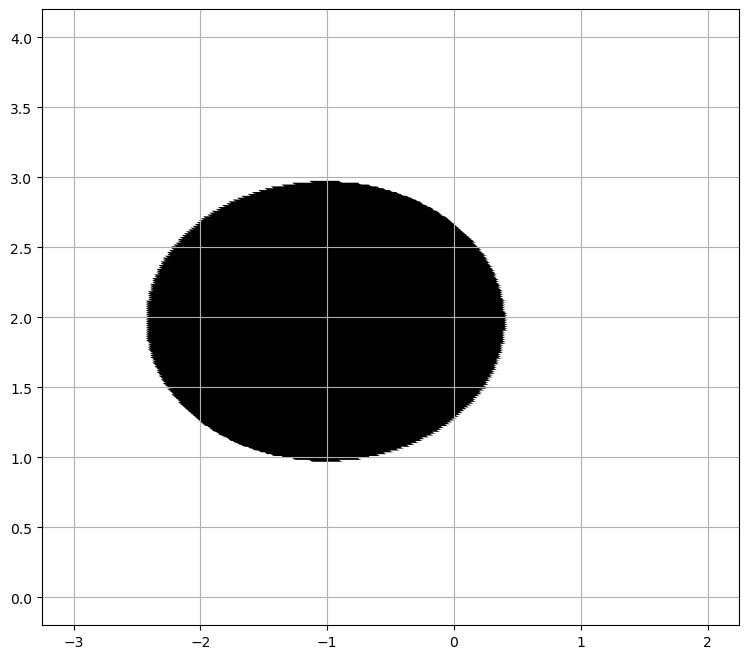

In [11]:
#Código de solución estudiante 1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N = 1000000

# Escribir la función acá
def montecarlo2(region, a1, b1, a2, b2, N):
    AR = (b1-a1)*(b2-a2)
    x = np.random.uniform(a1, b1, N)
    y = np.random.uniform(a2, b2, N)
    bi = region(x, y)
    AD_approx = AR*np.mean(bi)
    return AD_approx

def region(x, y):
    return (x)**2 + 2*(y)**2 <= -2*(x) + 8*(y) - 7



xnum = np.linspace(-3, 2, 300)
ynum = np.linspace(0, 4, 300)

X, Y = np.meshgrid(xnum, ynum)

##~
plt.figure(figsize=(9,8 ))

# Grafica los puntos del rectangulo R que estan dentro de la region D
plt.scatter(X, Y, c=~region(X,Y), cmap='bone') 

plt.grid()
plt.show()

In [12]:
# Resolver
a1, b1, a2, b2 = -3, 1, 0, 4

# Cantidad de términos a utilizar para la aproximación
N = np.logspace(1, 7, 7).astype(int)

# Crear la tabla (DataFrame de pandas)
tabla1 = pd.DataFrame(index = N, columns=['Aproximación'])

for n in N:
    area_aprox = montecarlo2(region, a1, b1, a2, b2, n)
    tabla1.loc[n, 'Aproximación'] = area_aprox
    tabla1.loc[n, 'Error'] = 100*np.abs(area_aprox - (np.pi*np.sqrt(2)))/(np.pi*np.sqrt(2))


tabla1

,Aproximación,Error
10,6.4,44.050611
100,3.68,17.170899
1000,4.064,8.527862
10000,4.4528,0.223212
100000,4.4184,0.551060
1000000,4.437264,0.126471
10000000,4.444518,0.036811


Código de solución estudiante 2

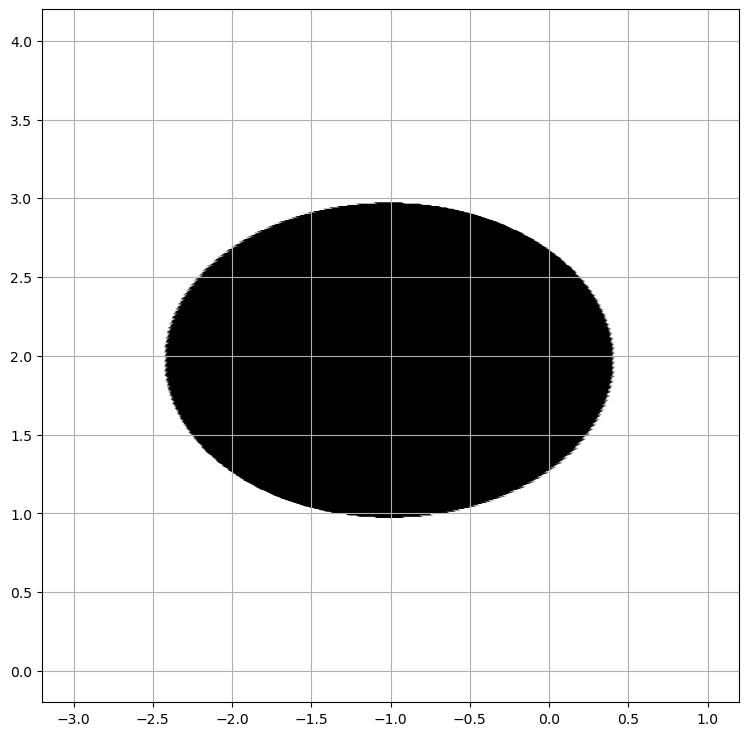

,Aproximación,Error
1,0.0,100.000000
10,4.8,8.037958
100,4.64,4.436693
1000,4.368,1.685458
10000,4.4672,0.547326
100000,4.4336,0.208940


In [13]:
# Código de solución estudiante 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def m2(reg, a1, b1, a2, b2, N):
    AR = (b1-a1)*(b2-a2)
    x = np.random.uniform(a1, b1, N)
    y = np.random.uniform(a2, b2, N)
    bi = reg(x, y)
    AD_approx = AR*np.mean(bi)
    return AD_approx

def reg(x, y):
    return x**2 + 2*y**2 <= -2*x + 8*y - 7

xnum = np.linspace(-3, 1, 500)
ynum = np.linspace(0, 4, 500)

X, Y = np.meshgrid(xnum, ynum)

plt.figure(figsize=(9, 9))

plt.scatter(X, Y, c=~reg(X,Y), cmap='bone') 

plt.grid()
plt.show()

a1, b1, a2, b2 = -3, 1, 0, 4

N = np.logspace(0, 5, 6).astype(int)

tabla = pd.DataFrame(index = N, columns=['Aproximación'])


for n in N:
    area_aprox = m2(reg, a1, b1, a2, b2, n)
    tabla.loc[n, 'Aproximación'] = area_aprox
    tabla.loc[n, 'Error'] = 100*np.abs(area_aprox - (np.pi*np.sqrt(2)))/(np.pi*np.sqrt(2))

tabla